## Exercises for Pandas

### Notebook examples
* Check in detail the examples presented
  * Vary methods, outputs, plots, ...
  
  
### Titanic Data with Pandas
Using Pandas-IO, Dataframes and the groupby Function the analysis of survival rates by class and sex is rather straightforward ...

Solution: [pd_titanic.py](http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/python2/source/pd_titanic.py)

### Weather Data
* Investigate other variables or aggregations, e.g. variance of Temperatur, Sonnenschein (daily sun-shine), Schneehöhe (Snow-height), Number of days with  snow, ...
* Last night (Feb 26, 2018) was reportedly the coldest night of this winter with -27 degree. Check in the Zugspitze data for yearly minimum temperature. How often has it been colder?
* Take data from other weather stations ([DWD Archiv](https://www.dwd.de/DE/leistungen/klimadatendeutschland/klarchivtagmonat.html), i.e. Hohenpeißenberg, Helgoland, ...)
  * here an [example notebook](http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/sw/nb/AnalysisOfMunichWeatherData.ipynb) contributed by J.Kühne in the 2020 course

 


### Energy Charts

How to manage the transition to renewable energy production is a highly disputet and controversial subject.
Interesting input to the discussion provide the energy-charts 
https://www.energy-charts.info/index.html?l=de&c=DE
which show timeline of electricity usage together with production from different sources. One can also export the data in csv format and use Pandas for more detailed investigations:


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

df=pd.read_csv('http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/sw/source/energy-charts_Oeffentliche_Nettostromerzeugung_in_Deutschland_2021.csv',index_col='Datum (GMT+1)',parse_dates=['Datum (GMT+1)'],engine='python')
print (df.size)
print (df.columns)
# combine wind
df['Wind'] = df['Wind Onshore'] + df['Wind Offshore']

595680
Index(['Kernenergie', 'Laufwasser', 'Biomasse', 'Braunkohle', 'Steinkohle',
       'Öl', 'Erdgas', 'Geothermie', 'Speicherwasser', 'Pumpspeicher',
       'Andere', 'Andere Erneuerbare', 'Müll', 'Wind Offshore', 'Wind Onshore',
       'Solar', 'Last'],
      dtype='object')


In [3]:
df[df.Last==df.Last.max()]

,Kernenergie,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Andere Erneuerbare,Müll,Wind Offshore,Wind Onshore,Solar,Last,Wind
Datum (GMT+1),,,,,,,,,,,,,,,,,,
2021-11-30 10:45:00+00:00,7403.6,1301.3,4616.5,12786.5,6292.3,111.1,5322.2,25.6,58.6,268.5,83.6,143.8,1107.8,5550.8,40018.5,1953.6,81366.1,45569.3


<AxesSubplot:xlabel='Datum (GMT+1)'>

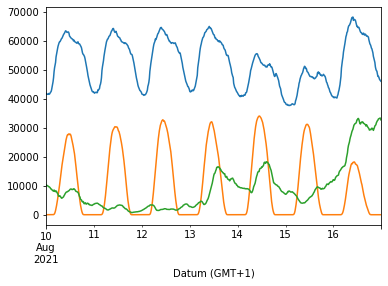

In [2]:
# plot short date range
day = '2021-08-10'
day2 ='2021-08-16'
df['Last'][day:day2].plot()
df.Solar[day:day2].plot()
df.Wind[day:day2].plot()


In [ ]:
# plot weekly averages
dfm=df.resample('w').sum()
dfm.Last.plot()
dfm.Wind.plot()
dfm.Solar.plot()


* how much would you need to scale up solar or wind production to match consumption ('Last')?
* how big is the gap (=sum of periods when production is below consumption) for solar-only (and wind-only)?
* minimize that gap by combining solar and wind

### Football results
 
Based on article in  iX Nov/Dec 2015, data source at http://www.football-data.co.uk/mmz4281/1516/D1.csv



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# direct read from url
data = pd.read_csv('http://www-static.etp.physik.uni-muenchen.de/kurs/Computing/sw/source/D1s.csv')
# data = pd.read_csv('D1s.csv')
data.info();

In [ ]:
data.head()

#### Some examples how to explore the data

In [ ]:
#

# matches with > 3 Auswaertstore
data[data.ATore>3]
# die meisten Auswaertstore
data.ATore.max()
#...
# Eintrag fuer meiste Auswaertstore
data[data.ATore==data.ATore.max()]
#...

# Heimsiege fuer Mainz
data[data.Heim=='Mainz'][data.HTore>data.ATore].count()
#...
# Mittelwert Heimtore
data.groupby('Heim')['HTore'].mean()
#...
# Heimtore Verlauf fuer Stuttgart
data.HTore[data.Heim=='Stuttgart'].cumsum().plot()

# Tordifferenz zufuegen
data['TDiff']=np.abs(data.HTore-data.ATore)


#### A few more things to check:
* which match had most Heimtore, which the largest Tordifferenz?

* Make plot of season distribution for Heim und Auswärtstore for your favorite team.

* *For statistics experts:* Determine the distribution of the number of goals per match, i.e. how often occur how many goals, does it follow the Poisson statistics?
